In [304]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from plotnine.data import diamonds
import pandas as pd
from plotnine import *





In [305]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Gruoup,Group
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(0.0, 0.5]","(0.0, 0.5]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(0.0, 0.5]","(0.0, 0.5]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(0.0, 0.5]","(0.0, 0.5]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(0.0, 0.5]","(0.0, 0.5]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(0.0, 0.5]","(0.0, 0.5]"


In [306]:
tablaCutClarity=pd.crosstab(diamonds['cut'],columns= diamonds['clarity'], aggfunc = "mean", values = diamonds['depth'])

Caculando fracuencias absolutas y relativas

In [307]:
tbf3=pd.crosstab(diamonds['cut'],columns= diamonds['clarity'], aggfunc = "count", values = diamonds['clarity']).reset_index()
tbf3

clarity,cut,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
0,Fair,210,466,408,261,170,69,17,9
1,Good,96,1081,1560,978,648,286,186,71
2,Very Good,84,2100,3240,2591,1775,1235,789,268
3,Premium,205,2949,3575,3357,1989,870,616,230
4,Ideal,146,2598,4282,5071,3589,2606,2047,1212


#Frecuencia relativa de agrupamiento de cut filtrado por claridad

In [308]:
tbf3[['I1','SI2','SI1',	'VS2','VS1','VVS2',	'VVS1',	'IF']].apply(lambda x: x/tbf3.sum(),axis=1,result_type='expand')

C:\Users\daniel\AppData\Local\Temp\ipykernel_21024\1709032328.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


clarity,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
0,0.283401,0.050685,0.031228,0.021292,0.020805,0.013620,0.004651,0.005028
1,0.129555,0.117577,0.119403,0.079785,0.079305,0.056455,0.050889,0.039665
2,0.113360,0.228410,0.247991,0.211372,0.217232,0.243782,0.215869,0.149721
3,0.276653,0.320753,0.273632,0.273862,0.243422,0.171733,0.168536,0.128492
4,0.197031,0.282576,0.327746,0.413689,0.439236,0.514410,0.560055,0.677095


In [309]:
tb4=pd.crosstab(diamonds['cut'],columns= diamonds['clarity']).reset_index()
tb4.apply(lambda x: x/tb4.sum(),axis=1,result_type='expand')

C:\Users\daniel\AppData\Local\Temp\ipykernel_21024\1699714206.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,cut
0,0.283401,0.005028,0.031228,0.050685,0.020805,0.021292,0.004651,0.013620,NaN
1,0.129555,0.039665,0.119403,0.117577,0.079305,0.079785,0.050889,0.056455,NaN
2,0.113360,0.149721,0.247991,0.228410,0.217232,0.211372,0.215869,0.243782,NaN
3,0.276653,0.128492,0.273632,0.320753,0.243422,0.273862,0.168536,0.171733,NaN
4,0.197031,0.677095,0.327746,0.282576,0.439236,0.413689,0.560055,0.514410,NaN


In [310]:
#tabla de frecuencia con porcentaje FRECUENCIA RELATIVA
tablaFrec=pd.crosstab(diamonds['cut'],columns= 'conteo')
tablaFrec['Porcen']=100*tablaFrec['conteo']/tablaFrec['conteo'].sum()
tablaFrec

col_0,conteo,Porcen
cut,,
Fair,1610,2.984798
Good,4906,9.095291
Very Good,12082,22.398962
Premium,13791,25.567297
Ideal,21551,39.953652


In [311]:
#tabla de frecuencia con porcentaje
tfr2=diamonds.groupby('cut').agg(frequency=('clarity','count'))
tfr2['Porcentaje']=tfr2.apply(lambda x: x*100/tfr2.sum(),axis=1, result_type='expand')
tfr2=tfr2.reset_index()
tfr2

,cut,frequency,Porcentaje
0,Fair,1610,2.984798
1,Good,4906,9.095291
2,Very Good,12082,22.398962
3,Premium,13791,25.567297
4,Ideal,21551,39.953652


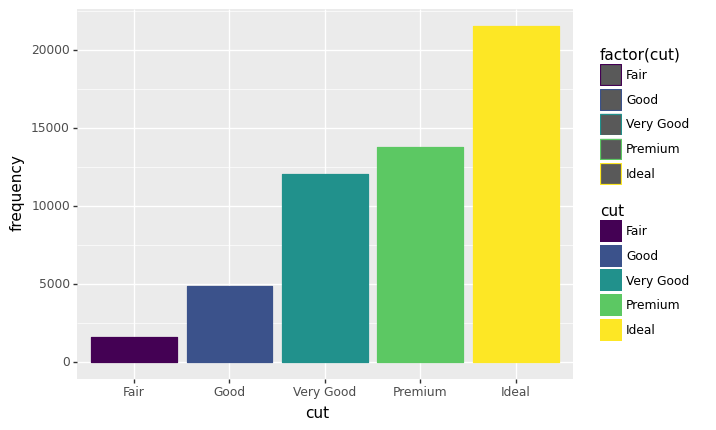

<ggplot: (171216942687)>

In [312]:
#graficando con ggplot plotnine

#grafico de barras 
(ggplot(tfr2,aes(x='cut',y='frequency',color='factor(cut)',fill='cut')) + geom_bar(stat='identity') )

In [313]:
diamonds.groupby('cut').agg(frequency=('clarity','count'), mediaDepth=('depth','mean')).cumsum()

,frequency,mediaDepth
cut,,
Fair,1610,64.041677
Good,6516,126.407556
Very Good,18598,188.225831
Premium,32389,249.490503
Ideal,53940,311.199904


In [314]:
diamonds.groupby('cut').agg(frequency=('clarity','count'), PorcDepth= ('clarity','count')).reset_index() #resetear el index permite ubicar cut como nombre de columna y sacarlo de indice

,cut,frequency,PorcDepth
0,Fair,1610,1610
1,Good,4906,4906
2,Very Good,12082,12082
3,Premium,13791,13791
4,Ideal,21551,21551


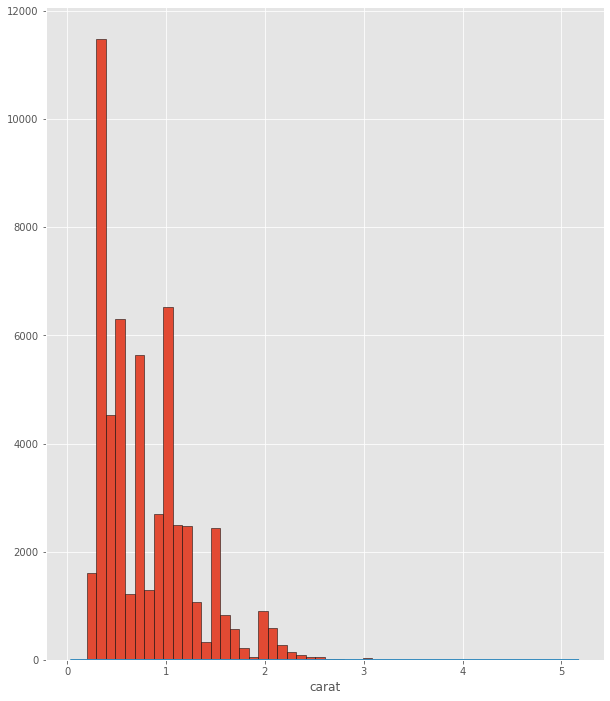

In [352]:
#Una de frecuencia por grupos de
#agrupamos con cut , agrupamos peso (kilates -carat) o tamaño
bins = list(np.arange(0, 4, 0.5))
diamonds['Group']=pd.cut(diamonds['carat'],bins=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])


diamonds.groupby('Group').agg(frequency=('Group','count'))

fig, ax=plt.subplots(figsize=(10,12))
ax.hist(diamonds['carat'], bins=50, edgecolor = "black")







TypeError: cannot unpack non-iterable AxesSubplot object

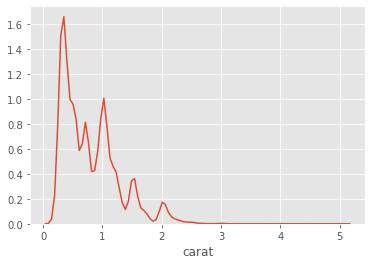

In [354]:
import seaborn as sbn 
dist=sbn.distplot(diamonds['carat'],bins=50,hist=False)

plt.show()

<AxesSubplot:ylabel='Density'>

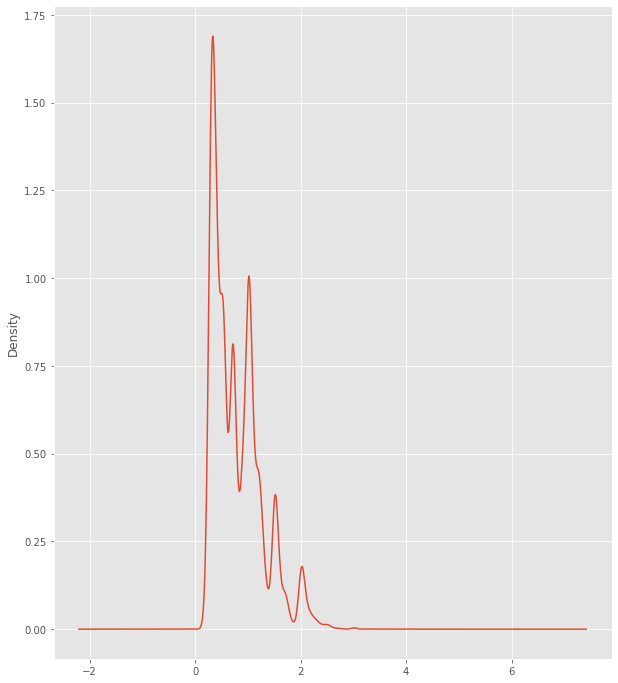

In [331]:
fig, ax=plt.subplots(figsize=(10,12))

diamonds['carat'].plot(kind='density')

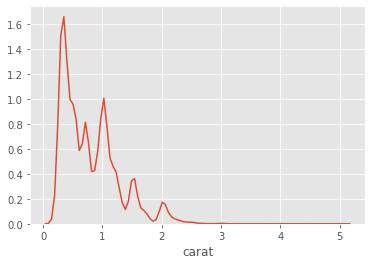

In [337]:
import seaborn as sbn 
sbn.distplot(diamonds['carat'],bins=50,hist=False)
plt.show()

In [316]:
pd.crosstab(diamonds['cut'],columns= diamonds['clarity'])

clarity,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
cut,,,,,,,,
Fair,210,466,408,261,170,69,17,9
Good,96,1081,1560,978,648,286,186,71
Very Good,84,2100,3240,2591,1775,1235,789,268
Premium,205,2949,3575,3357,1989,870,616,230
Ideal,146,2598,4282,5071,3589,2606,2047,1212


<AxesSubplot:title={'center':'carat'}, xlabel='cut'>

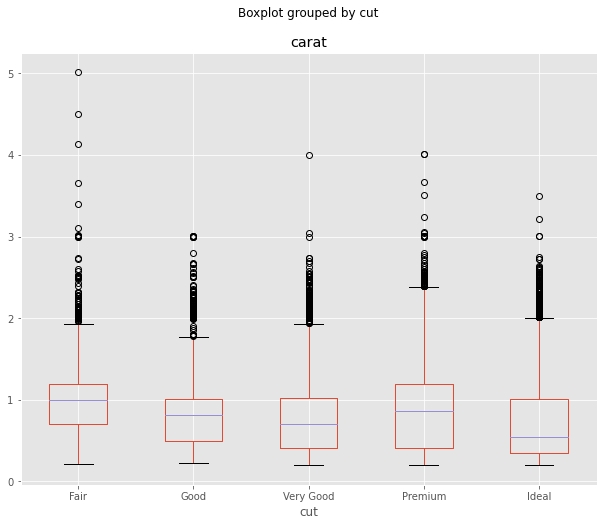

In [317]:

diamonds.boxplot(column='carat',by='cut', figsize = (10, 8))

<AxesSubplot:title={'center':'carat'}, xlabel='cut'>

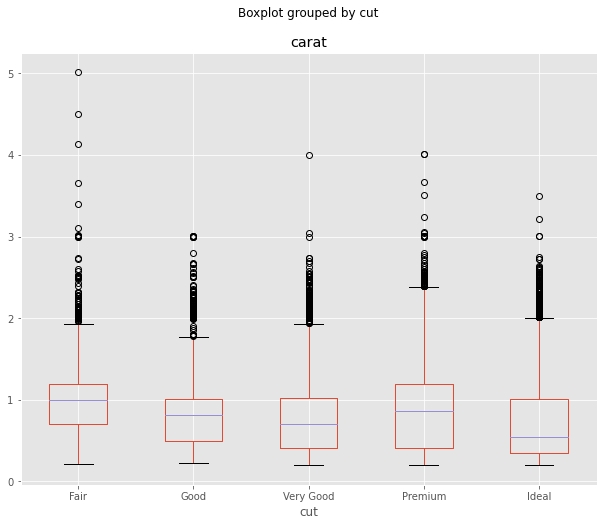

In [318]:
diamonds.boxplot(column='carat',by='cut', figsize = (10, 8))

9

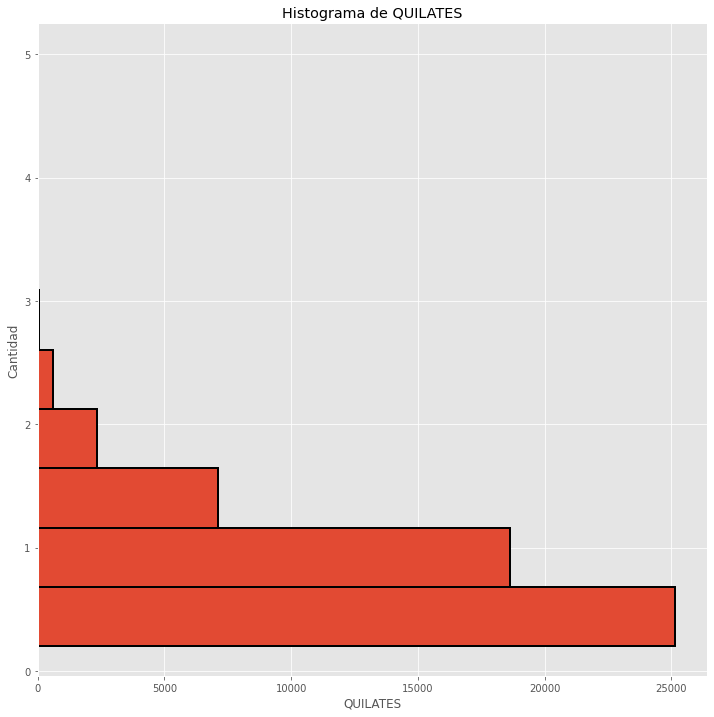

In [319]:
fig,ax=plt.subplots(figsize=(12,12))
plt.style.use('ggplot')
ax.hist(x=diamonds['carat'],bins=10,lw=2,orientation= 'horizontal',edgecolor='black')
ax.set_title('Histograma de QUILATES')
ax.set_xlabel('QUILATES')
ax.set_ylabel('Cantidad')


9

In [320]:
tb5=diamonds.groupby('cut').agg(frecuenciaCara=('carat','count')).reset_index()
tb5[tb5['cut']!='Fair']#filtrando 
#filtrando el por valores de un grupo 


,cut,frecuenciaCara
1,Good,4906
2,Very Good,12082
3,Premium,13791
4,Ideal,21551


In [321]:
diamonds.groupby('carat').rank(method='dense')

C:\Users\daniel\AppData\Local\Temp\ipykernel_21024\80494226.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.rank is deprecated. In a future version, a TypeError will be raised. Before calling .rank, select only columns which should be valid for the function.


,depth,table,price,x,y,z
0,36.0,4.0,1.0,13.0,15.0,11.0
1,4.0,5.0,1.0,5.0,5.0,3.0
2,3.0,13.0,2.0,23.0,24.0,1.0
3,36.0,6.0,1.0,4.0,6.0,12.0
4,60.0,28.0,1.0,13.0,15.0,23.0
...,...,...,...,...,...,...
53935,29.0,15.0,270.0,21.0,24.0,13.0
53936,52.0,9.0,270.0,15.0,23.0,24.0
53937,65.0,25.0,546.0,28.0,38.0,30.0
53938,7.0,7.0,5.0,15.0,12.0,5.0
